# ***`.describe()`, `.value_counts()`, `.value_counts(normalize=True)`, `.value_counts(dropna=False)`***

In [51]:
import pandas as pd

adult = pd.read_csv('adult.csv')
print(adult['Marital Status'].describe(), "\n\n")
print(adult['Marital Status'].value_counts(), "\n\n")
print(adult['Marital Status'].value_counts(normalize=True), "\n\n")

count                   32561
unique                      7
top        Married-civ-spouse
freq                    14976
Name: Marital Status, dtype: object 


 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital Status, dtype: int64 


 Married-civ-spouse      0.460
 Never-married           0.328
 Divorced                0.136
 Separated               0.031
 Widowed                 0.030
 Married-spouse-absent   0.013
 Married-AF-spouse       0.001
Name: Marital Status, dtype: float64 




### ***Exploring a target variable***

You have been asked to build a machine learning model to predict whether or not a person makes over $50,000 in a year. To understand the target variable, `Above/Below 50k`, you decide to explore the variable in more detail.

* Explore the `Above/Below 50k` variable by printing out a description of the variable's contents.
* Explore the `Above/Below 50k` variable by printing out a frequency table of the values found in this column.
* Rerun **`.value_counts()`**, but this time print out the relative frequency values instead of the counts.

In [9]:
import pandas as pd

adult = pd.read_csv('adult.csv')

# Explore the Above/Below 50k variable
print(adult["Above/Below 50k"].describe(),"\n")

# Print a frequency table of "Above/Below 50k"
print(adult["Above/Below 50k"].value_counts(),"\n")

# Print relative frequency values
print(adult["Above/Below 50k"].value_counts(normalize=True),"\n")

count      32561
unique         2
top        <=50K
freq       24720
Name: Above/Below 50k, dtype: object 

 <=50K    24720
 >50K      7841
Name: Above/Below 50k, dtype: int64 

 <=50K    0.75919
 >50K     0.24081
Name: Above/Below 50k, dtype: float64 



# ***Creating a categorical Series***

In [10]:
my_data = ["A", "A", "C", "B", "C", "A"]
my_series1 = pd.Series(my_data, dtype="category")
print(my_series1)

0    A
1    A
2    C
3    B
4    C
5    A
dtype: category
Categories (3, object): ['A', 'B', 'C']


# ***Creating a categorical Series with Order***

In [11]:
my_data = ["A", "A", "C", "B", "C", "A"]
my_series2 = pd.Categorical(my_data, categories=["C", "B", "A"], ordered=True)
my_series2

['A', 'A', 'C', 'B', 'C', 'A']
Categories (3, object): ['C' < 'B' < 'A']

# ***Specify dtypes when reading data***


In [12]:
import pandas as pd

adult = pd.read_csv("adult.csv", dtype={"Marital Status": "category"})
adult["Marital Status"].dtype

CategoricalDtype(categories=[' Divorced', ' Married-AF-spouse', ' Married-civ-spouse',
                  ' Married-spouse-absent', ' Never-married', ' Separated',
                  ' Widowed'],
, ordered=False)

### ***Setting dtypes and saving memory***

A colleague of yours is exploring a list of occupations and how they relate to salary. She has given you a list of these occupations, `list_of_occupations`, and has a few simple questions such as "How many different titles are there?" and "Which position is the most common?".

* Create a pandas Series, `series1`, using the `list_of_occupations` (do not set the dtype).
* Print both the data type and number of bytes used of this new Series.
* Create a second pandas Series, `series2`, using the `list_of_occupations` and set the `dtype` to `"category"`.
* Print both the data type and number of bytes used of this new Series.

In [13]:
list_of_occupations = ['Data Scientist', 'Data Analyst', 'Data Scientist', 'Statistician', 'Data Scientist', 'Data Scientist', 'Statistician', 'Data Scientist', 'Data Analyst', 'Data Analyst', 'Data Scientist', 'Data Scientist', 'Data Scientist', 'Data Scientist', 'Data Scientist', 'Data Analyst', 'Data Scientist', 'Data Scientist', 'Data Analyst', 'Data Scientist']

# Create a Series, default dtype
series1 = pd.Series(list_of_occupations)

# Print out the data type and number of bytes for series1
print("series1 data type:", series1.dtype)
print("series1 number of bytes:", series1.nbytes)

# Create a Series, "category" dtype
series2 = pd.Series(list_of_occupations, dtype="category")

# Print out the data type and number of bytes for series2
print("series2 data type:", series2.dtype)
print("series2 number of bytes:", series2.nbytes)

series1 data type: object
series1 number of bytes: 160
series2 data type: category
series2 number of bytes: 44


### ***Creating a categorical pandas Series***

Another colleague at work has collected information on the number of `"Gold"`, `"Silver"`, and `"Bronze"` medals won by the USA at the Summer & Winter Olympics since 1896. She has provided this as a list, `medals_won`. Before taking a look at the total number of each medal won, you want to create a categorical pandas Series. However, you know that these medals have a specific order to them and that `Gold` is better than `Silver`, but `Silver` is better than `Bronze`. Use the object, `medals_won`, to help

* Create a categorical pandas Series without using **`pd.Series()`**.
* Specify the three known medal categories such that `"Bronze"` < `"Silver"` < `"Gold"`.
* Specify that the order of the categories is important when creating this Series.

In [14]:
medals_won = ['Silver', 'Silver', 'Bronze', 'Silver', 'Gold', 'Silver', 'Silver', 'Gold', 'Gold', 'Bronze', 'Bronze','Gold', 'Silver', 'Silver', 'Silver', 'Gold', 'Gold', 'Bronze', 'Silver', 'Gold']

# Create a categorical Series and specify the categories (let pandas know the order matters!)
medals = pd.Categorical(medals_won, categories=['Bronze', 'Silver', 'Gold'], ordered=True)
print(medals)

['Silver', 'Silver', 'Bronze', 'Silver', 'Gold', ..., 'Gold', 'Gold', 'Bronze', 'Silver', 'Gold']
Length: 20
Categories (3, object): ['Bronze' < 'Silver' < 'Gold']


### ***Setting dtype when reading data***

You are preparing to create a machine learning model to predict a person's income category using the `adult` census income dataset. You don't have access to any cloud resources and you want to make sure that your laptop will be able to load the full dataset and process its contents.

* Call the correct attribute on the `adult` DataFrame to review the data types.
* Create a dictionary with keys: `"Workclass"`, `"Education"`, `"Relationship"`, and `"Above/Below 50k"`.
* Set the value for each key to be `"category"`.
* Use the newly created dictionary, `adult_dtypes`, when reading in `adult.csv`

In [17]:
import pandas as pd

adult = pd.read_csv("adult.csv")

# Check the dtypes
print(adult.dtypes, "\n")

# Create a dictionary with column names as keys and "category" as values
adult_dtypes = {"Marital Status": "category", "Workclass": "category", "Education": "category", "Relationship": "category", "Above/Below 50k": "category"}

# Read in the CSV using the dtypes parameter
adult2 = pd.read_csv("adult.csv", dtype=adult_dtypes)
print(adult2.dtypes)

Age                 int64
Workclass          object
fnlgwt              int64
Education          object
Education Num       int64
Marital Status     object
Occupation         object
Relationship       object
Race               object
Sex                object
Capital Gain        int64
Capital Loss        int64
Hours/Week          int64
Country            object
Above/Below 50k    object
dtype: object 

Age                   int64
Workclass          category
fnlgwt                int64
Education          category
Education Num         int64
Marital Status     category
Occupation           object
Relationship       category
Race                 object
Sex                  object
Capital Gain          int64
Capital Loss          int64
Hours/Week            int64
Country              object
Above/Below 50k    category
dtype: object


Specifying the `dtypes` will lower the amount of memory required to load your dataset.

# ***`.groupby()` categorical data***

## *Equivalent to boolean subsetting*

In [24]:
import pandas as pd

adult = pd.read_csv("adult.csv", dtype={"Marital Status": "category", "Workclass": "category", "Education": "category", "Relationship": "category", "Above/Below 50k": "category"})

adult.groupby(by=["Above/Below 50k"]).get_group(' <=50K').equals(adult[adult["Above/Below 50k"] == " <=50K"])

True

In [25]:
adult.groupby(by=["Above/Below 50k"]).get_group(' >50K').equals(adult[adult["Above/Below 50k"] == " >50K"])

True

In [29]:
adult.groupby(by=["Above/Below 50k"])[['Age', 'Education Num']].sum()

,Age,Education Num
Above/Below 50k,,
<=50K,909294,237190
>50K,346963,91047


In [30]:
adult.groupby(by=["Above/Below 50k"])[['Age', 'Education Num']].count()

,Age,Education Num
Above/Below 50k,,
<=50K,24720,24720
>50K,7841,7841


In [40]:
adult.groupby(by=["Above/Below 50k"])[['Age', 'Education Num']].size()

Above/Below 50k
 <=50K    24720
 >50K      7841
dtype: int64

In [31]:
adult.groupby(by=["Above/Below 50k"])[['Age', 'Education Num']].nunique()

,Age,Education Num
Above/Below 50k,,
<=50K,73,16
>50K,65,15


In [34]:
adult.groupby(by="Above/Below 50k")['Education Num'].value_counts()

Above/Below 50k  Education Num
 <=50K           9                8826
                 10               5904
                 13               3134
                 7                1115
                 11               1021
                 6                 871
                 12                802
                 14                764
                 4                 606
                 5                 487
                 8                 400
                 3                 317
                 2                 162
                 15                153
                 16                107
                 1                  51
 >50K            13               2221
                 9                1675
                 10               1387
                 14                959
                 15                423
                 11                361
                 16                306
                 12                265
                 6               

### ***Create lots of groups***

You want to find the mean Age of adults when grouping by the following categories:

* `"Workclass"` (which has 9 categories)
* `"Above/Below 50k"` (which has 2 categories)
* `"Education"` (which has 16 categories).

You have developed the following bit of code:

```
gb = adult.groupby(by=["Workclass", "Above/Below 50k", "Education"])
```

How many groups are in the `gb` object and what is the maximum possible number of groups that could have been created? 

ANSWER: Only combinations of the three variables that exist are created when using **`groupby()`**. In this example, 208 groups are created out of 288 (2 * 9 * 16) possible groups.

### ***Setting up a **`.groupby()`** statement***

The <ins>***gender wage gap***</ins> is a hot-topic item in the United States and across the world. Using the `adult` census income dataset, loaded as `adult`, you want to check if some of the recently published data lines up with this income survey.

* Split the `adult` dataset across the `"Sex"` and `"Above/Below 50k"` columns, saving this object as `gb`.
* Print out the number of observations found in each group.
* Using `gb`, find the average of each numerical column.

In [47]:
import pandas as pd
pd.options.display.float_format = '{:,.3f}'.format

adult = pd.read_csv("adult.csv", dtype={"Marital Status": "category", "Workclass": "category", "Education": "category", "Relationship": "category", "Above/Below 50k": "category"})

# Group the adult dataset by "Sex" and "Above/Below 50k"
gb = adult.groupby(['Sex', 'Above/Below 50k'])

# Print out how many rows are in each created group
print('How many rows are in each created group')
print(gb.size(), "\n")

# Print out the mean of each group for all columns
display(gb.mean())

How many rows are in each created group
Sex      Above/Below 50k
 Female   <=50K              9592
          >50K               1179
 Male     <=50K             15128
          >50K               6662
dtype: int64 



Age      fnlgwt  ...  Capital Loss  Hours/Week
Sex     Above/Below 50k                     ...                          
 Female  <=50K          36.211 185,999.381  ...        47.364      35.917
         >50K           42.126 183,687.406  ...       173.649      40.427
 Male    <=50K          37.147 193,093.609  ...        56.807      40.694
         >50K           44.626 188,769.101  ...       198.780      46.366

[4 rows x 6 columns]

It does look like the proportion of women (1,179 observations) making more than 50k is a lot lower than men (6,662 observations). However, women making more than 50k are on average younger (42 years) than their male counterparts (45 years).

### ***Using pandas functions effectively***

* Create a list of the names for two user-selected variables: `"Education"` and `"Above/Below 50k"`.
* Create a GroupBy object, `gb`, using the `user_list` as the grouping variables.
* Calculate the mean of `"Hours/Week"` across each group using the most efficient approach covered in the video.

In [48]:
import pandas as pd
pd.options.display.float_format = '{:,.3f}'.format

adult = pd.read_csv("adult.csv", dtype={"Marital Status": "category", "Workclass": "category", "Education": "category", "Relationship": "category", "Above/Below 50k": "category"})

# Create a list of user-selected variables
user_list = ["Education", "Above/Below 50k"]

# Create a GroupBy object using this list
gb = adult.groupby(user_list)

# Find the mean for the variable "Hours/Week" for each group - Be efficient!
print(gb['Hours/Week'].mean())

Education      Above/Below 50k
 10th           <=50K            36.574
                >50K             43.774
 11th           <=50K            33.323
                >50K             45.133
 12th           <=50K            35.035
                >50K             44.818
 1st-4th        <=50K            37.864
                >50K             48.833
 5th-6th        <=50K            38.539
                >50K             46.000
 7th-8th        <=50K            38.830
                >50K             47.500
 9th            <=50K            37.667
                >50K             44.852
 Assoc-acdm     <=50K            39.264
                >50K             44.257
 Assoc-voc      <=50K            40.818
                >50K             43.853
 Bachelors      <=50K            40.586
                >50K             45.475
 Doctorate      <=50K            45.430
                >50K             47.513
 HS-grad        <=50K            39.728
                >50K             45.043
 Masters 

People earning more than \$50,000 tend to work a lot more hours, regardless of their education, than people earning less than \$50,000. Remember, <ins>*it's important to select your variables before calling a function*</ins>. Large datatsets might have problems calculating the mean of every numerical column.

In [68]:
import pandas as pd

dogs = pd.read_csv('ShelterDogs.csv', dtype={'coat':'category', 'likes_people':'category'})
dogs['coat'].value_counts()

short         1972
medium         565
wirehaired     220
long           180
Name: coat, dtype: int64

# ***The `.cat` accessor***

* `new_categories` : a list of categories
* `inplace` : Boolean - whether or not the update should overwrite the Series
* `ordered` : Boolean - whether or not the categorical is treated as an ordered categorical

# ***Setting Series categories***

Any value not listed in the categories will be `NaN`.

In [56]:
dogs["coat"] = dogs["coat"].cat.set_categories(new_categories=["short", "medium", "long"])
dogs["coat"].value_counts(dropna=False)

short     1972
medium     565
NaN        220
long       180
Name: coat, dtype: int64

# ***Setting order***

In [57]:
dogs["coat"] = dogs["coat"].cat.set_categories(new_categories=["short", "medium", "long"], ordered=True)
dogs["coat"].head(3)

0    short
1    short
2    short
Name: coat, dtype: category
Categories (3, object): ['short' < 'medium' < 'long']

# ***Adding categories (ตรงนี้แค่ add ยังไม่ได้ assign ค่าใหม่ให้ `NaN`)***

In [63]:
print(dogs['likes_people'].value_counts(dropna=False))

dogs["likes_people"] = dogs["likes_people"].cat.add_categories(new_categories=["did not check", "could not tell"])

yes    1991
NaN     938
no        8
Name: likes_people, dtype: int64


# ***Removing categories***



In [69]:
print(dogs["coat"].cat.categories)

dogs["coat"] = dogs["coat"].cat.remove_categories(removals=["wirehaired"])

print(dogs["coat"].cat.categories)

Index(['long', 'medium', 'short', 'wirehaired'], dtype='object')
Index(['long', 'medium', 'short'], dtype='object')


### ***Adding categories***

The owner of a local dog adoption agency has listings for almost 3,000 dogs. One of the most common questions they have been receiving lately is: "What type of area was the dog previously kept in?". You are setting up a pipeline to do some analysis and want to look into what information is available regarding the `"keep_in"` variable. 

* Print the frequency of the responses in the `"keep_in"` variable and make sure the count of `NaN` values are shown.
* Convert the `"keep_in"` variable to a categorical Series.
* Add the list of new categories provided by the adoption agency, `new_categories`, to the `"keep_in"` column.
* Print the frequency counts of the `keep_in` column and do not drop `NaN` values.

In [71]:
import pandas as pd

dogs = pd.read_csv('ShelterDogs.csv', dtype={'coat':'category', 'likes_people':'category'})

# Check frequency counts while also printing the NaN count
print(dogs["keep_in"].value_counts(dropna=False), "\n\n")

# Switch to a categorical variable
dogs["keep_in"] = dogs["keep_in"].astype("category")

# Add new categories
new_categories = ["Unknown History", "Open Yard (Countryside)"]
dogs["keep_in"] = dogs["keep_in"].cat.add_categories(new_categories)

# Check frequency counts one more time
print(dogs['keep_in'].value_counts(dropna=False))

both flat and garden    1224
NaN                     1021
garden                   510
flat                     182
Name: keep_in, dtype: int64 


both flat and garden       1224
NaN                        1021
garden                      510
flat                        182
Unknown History               0
Open Yard (Countryside)       0
Name: keep_in, dtype: int64


When the adoption agency starts adding more information to this column, they will need to use one of the five categories now available in the `'keep_in'` variable.

### ***Removing categories***

Before adopting dogs, parents might want to know whether or not a new dog likes children. When looking at the adoptable dogs dataset, `dogs`, you notice that the frequency of responses for the categorical Series `"likes_children"` looks like this:

```
maybe     1718
yes       1172
no          47
```

The owner of the data wants to convert all `"maybe"` responses to `"no"`, as it would be unsafe to let a family adopt a dog if it doesn't like children. 

* Print out the categories of the categorical Series `dogs["likes_children"]`.
* Print out the frequency table for `"likes_children"` to see if any `"maybe"` responses remain.
* Print out the categories of `"likes_children"` one more time.

In [8]:
import pandas as pd

dogs = pd.read_csv('ShelterDogs.csv', dtype={'coat':'category', 'likes_people':'category'})
dogs['likes_children'].fillna('maybe', inplace=True)
dogs['likes_children'] = dogs['likes_children'].astype('category')

print(dogs['likes_children'].value_counts(dropna=False), "\n\n")

# Set "maybe" to be "no"
dogs.loc[dogs["likes_children"] == "maybe", "likes_children"] = "no"

# Print out categories
print(dogs["likes_children"].cat.categories,  "\n\n")

# Print the frequency table
print(dogs["likes_children"].value_counts(), "\n\n")

# Remove the "maybe" category
dogs["likes_children"] = dogs["likes_children"].cat.remove_categories(["maybe"])
print(dogs["likes_children"].value_counts(), "\n\n")

# Print the categories one more time
print(dogs['likes_children'].cat.categories)

maybe    1718
yes      1172
no         47
Name: likes_children, dtype: int64 


Index(['maybe', 'no', 'yes'], dtype='object') 


no       1765
yes      1172
maybe       0
Name: likes_children, dtype: int64 


no     1765
yes    1172
Name: likes_children, dtype: int64 


Index(['no', 'yes'], dtype='object')


# ***Renaming categories***

In [13]:
dogs["breed"] = dogs["breed"].astype("category")
dogs["breed"].value_counts().head(3)

Unknown                    1524
German Shepherd Dog Mix     190
Dachshund Mix               147
Name: breed, dtype: int64

In [12]:
dogs["breed"] = dogs["breed"].cat.rename_categories({"Unknown Mix": "Unknown"})
dogs["breed"].value_counts().head(3)

Unknown                    1524
German Shepherd Dog Mix     190
Dachshund Mix               147
Name: breed, dtype: int64

# ***Renaming categories with a function***

In [15]:
dogs['sex'] = dogs['sex'].astype('category')  
print(dogs['sex'].cat.categories, "\n")
dogs['sex'] = dogs['sex'].cat.rename_categories(lambda c: c.title())
print(dogs['sex'].cat.categories)

Index(['female', 'male'], dtype='object') 

Index(['Female', 'Male'], dtype='object')


# ***Common replacement issues***

* Must use new category names

In [ ]:
# Does not work! "Unknown" already exists
use_new_categories = {"Unknown Mix": "Unknown"}

* Cannot collapse two categories into one

In [ ]:
# Does not work! New names must be unique
cannot_repeat_categories = {"Unknown Mix": "Unknown", "Mixed Breed": "Unknown"}

# ***To collapse categories you must convert back to categorical type***
## ***Probably in earlier pandas version***

In [30]:
import pandas as pd

dogs = pd.read_csv('ShelterDogs.csv', dtype={'coat':'category', 'likes_people':'category'})

dogs["color"] = dogs["color"].astype("category")
print(dogs["color"].cat.categories)

Index(['apricot', 'black', 'black and brown', 'black and tan',
       'black and white', 'brown', 'brown and white', 'dotted', 'golden',
       'gray', 'gray and black', 'gray and white', 'red', 'red and white',
       'sable', 'saddle back', 'spotty', 'striped', 'tricolor', 'white',
       'wild boar', 'yellow', 'yellow-brown'],
      dtype='object')


In [32]:
update_colors = {"black and brown": "black","black and tan": "black","black and white": "black"}
dogs["main_color"] = dogs["color"].replace(update_colors)
dogs["main_color"].dtype

CategoricalDtype(categories=['apricot', 'black', 'brown', 'brown and white', 'dotted',
                  'golden', 'gray', 'gray and black', 'gray and white', 'red',
                  'red and white', 'sable', 'saddle back', 'spotty', 'striped',
                  'tricolor', 'white', 'wild boar', 'yellow', 'yellow-brown'],
, ordered=False)

### ***Renaming categories***

The `likes_children` column of the adoptable dogs dataset needs an update. Here are the current frequency counts:

```
Maybe?    1718
yes       1172
no          47
```

Two things that stick out are the differences in capitalization and the `?` found in the `Maybe?` category. The data should be cleaner than this and you are being asked to make a few changes.

* Create a dictionary called `my_changes` that will update the `Maybe?` category to `Maybe`.
* Rename the categories in `likes_children` using the `my_changes` dictionary.
* Update the categories one more time so that all categories are uppercase using the `.upper()` method.
* Print out the categories of the updated `likes_children` Series.

In [35]:
import pandas as pd

dogs = pd.read_csv('ShelterDogs.csv', dtype={'coat':'category', 'likes_people':'category'})
dogs['likes_children'].fillna('Maybe?', inplace=True)
dogs['likes_children'] = dogs['likes_children'].astype('category')

print(dogs['likes_children'].value_counts(dropna=False), "\n\n")

# Create the my_changes dictionary
my_changes = {'Maybe?':'Maybe'}

# Rename the categories listed in the my_changes dictionary
dogs["likes_children"] = dogs["likes_children"].cat.rename_categories(my_changes)

# Use a lambda function to convert all categories to uppercase using upper()
dogs["likes_children"] =  dogs["likes_children"].cat.rename_categories(lambda c: c.upper())

# Print the list of categories
print(dogs["likes_children"].cat.categories)

Maybe?    1718
yes       1172
no          47
Name: likes_children, dtype: int64 


Index(['MAYBE', 'NO', 'YES'], dtype='object')


### ***Collapsing categories***

One problem that users of a local dog adoption website have voiced is that there are too many options. As they look through the different types of dogs, they are getting lost in the overwhelming amount of choice. To simplify some of the data, you are going through each column and collapsing data if appropriate. To preserve the original data, you are going to make new updated columns in the dogs dataset. You will start with the `coat` column. The frequency table is listed here:

```
short          1969
medium          565
wirehaired      220
long            180
medium-long       3
```

* Create a dictionary named `update_coats` to map both `wirehaired` and `medium-long` to medium.
* Collapse the categories listed in this new dictionary and save this as a new column, `coat_collapsed`.
* Convert this new column into a categorical Series.
* Print the frequency table of this new Series.

In [37]:
import pandas as pd

dogs = pd.read_csv('ShelterDogs.csv', dtype={'coat':'category', 'likes_people':'category'})

# Create the update_coats dictionary
update_coats = {'wirehaired':'medium', 'medium-long':'medium'}

# Create a new column, coat_collapsed
dogs["coat_collapsed"] = dogs["coat"].replace(update_coats)

# Convert the column to categorical (Not necessary in recent Pandas)
dogs["coat_collapsed"] = dogs["coat_collapsed"].astype('category')

# Print the frequency table
print(dogs["coat_collapsed"].value_counts())

short     1972
medium     785
long       180
Name: coat_collapsed, dtype: int64


# ***Reordering Categories***



In [47]:
import pandas as pd

dogs = pd.read_csv('ShelterDogs.csv', dtype={'coat':'category', 'likes_people':'category'})

# Display by alphabetical order
print(dogs.groupby('coat')['age'].mean(), "\n")

dogs["coat"] = dogs["coat"].cat.reorder_categories(new_categories=['short', 'medium', 'wirehaired', 'long'], ordered=True)

# Display by order
print(dogs.groupby('coat')['age'].mean(), '\n')

# Display by what we typed but don't make this category ordinal
dogs["coat"] = dogs["coat"].cat.reorder_categories(new_categories=['wirehaired', 'medium', 'short', 'long'], ordered=True)
print(dogs.groupby('coat')['age'].mean())

coat
long          9.552056
medium        9.027982
short         8.364746
wirehaired    8.424136
Name: age, dtype: float64 

coat
short         8.364746
medium        9.027982
wirehaired    8.424136
long          9.552056
Name: age, dtype: float64 

coat
wirehaired    8.424136
medium        9.027982
short         8.364746
long          9.552056
Name: age, dtype: float64


### ***Reordering categories in a Series***

The owner of a local dog adoption agency has asked you take a look at her data on adoptable dogs. She is specifically interested in the size of the dogs in her dataset and wants to know if there are differences in other variables, given a dog's size. 

* Print out the current categories of the `"size"` pandas Series.
* Reorder categories in the `"size"` column using the categories `"small"`, `"medium"`, `"large"`.

In [48]:
import pandas as pd

dogs = pd.read_csv('ShelterDogs.csv', dtype={'coat':'category', 'likes_people':'category', 'size':'category'})

# Reorder the categries, specifying the Series is ordinal
dogs["size"] = dogs["size"].cat.reorder_categories(new_categories=["small", "medium", "large"],  ordered=True)

### ***Using .groupby() after reordering***

It is now time to run some analyses on the adoptable dogs dataset that is focused on the `"size"` of the dog. You have already developed some code to reorder the categories. In this exercise, you will develop two similar GroupBy statements to help better understand the effect of `"size"` on other variables. 


* Print out the frequency table of `"sex"` for each category of the `"size"` column.
* Print out the frequency table of `"keep_in"` for each category of the `"size"` column.

In [49]:
# How many Male/Female dogs are available of each size?
print(dogs.groupby('size')['sex'].value_counts())

# Do larger dogs need more room to roam?
print(dogs.groupby('size')['keep_in'].value_counts(normalize=True))

size    sex   
small   male       260
        female     214
medium  male      1090
        female     854
large   male       331
        female     188
Name: sex, dtype: int64
size    keep_in             
small   both flat and garden    0.702065
        flat                    0.235988
        garden                  0.061947
medium  both flat and garden    0.657568
        garden                  0.262200
        flat                    0.080232
large   both flat and garden    0.519022
        garden                  0.467391
        flat                    0.013587
Name: keep_in, dtype: float64


There are more medium male dogs than any other combination of size and sex. It also looks like larger dogs are more often kept outside, as opposed to a flat.

# ***Fixing issues: whitespace***

**`.str.strip()`**

# ***Fixing issues: capitalization***

**`.title()`** , **`.upper()`** , **`.lower()`**

# ***Fixing issues: misspelled words***

* Fixing a typo with **`.replace()`**

```
replace_map = {"Noo": "No"}
dogs["get_along_cats"].replace(replace_map, inplace=True)
```

# ***Searching for a string***

```
dogs["breed"].str.contains("Shepherd", regex=False)
```

In [51]:
import pandas as pd

dogs = pd.read_csv('ShelterDogs.csv', dtype={'coat':'category', 'likes_people':'category', 'size':'category'})

dogs['get_along_cats'].value_counts(dropna=False)

NaN    2506
yes     275
no      156
Name: get_along_cats, dtype: int64

### ***Cleaning variables***

Users of an online entry system used to have the ability to freely type in responses to questions. This is causing issues when trying to analyze the adoptable dogs dataset, `dogs`. Here is the current frequency table of the `"sex"` column:

```
male      1672
female    1249
 MALE        10
 FEMALE       5
Malez        1
```
Now that the system only takes responses of `"female"` and `"male"`, you want this variable to match the updated system.

* Update the misspelled response `"Malez"` to be `"male"` by creating the replacement map, `replace_map`.
* Replace all occurrences of `"Malez"` with `"male"` by using `replace_map`.
* Remove the leading spaces of the `" MALE"` and `" FEMALE"` responses.
* Convert all responses to be strictly lowercase.
* Convert the `"sex"` column to a categorical `pandas` Series.

In [54]:
import pandas as pd

dogs = pd.read_csv('ShelterDogs.csv', dtype={'coat':'category', 'likes_people':'category', 'size':'category', 'sex':'category'})

# Fix the misspelled word
replace_map = {"Malez": "male"}

# Update the sex column using the created map
dogs["sex"] = dogs["sex"].replace(replace_map)

# Strip away leading whitespace
dogs["sex"] = dogs["sex"].str.strip()

# Make all responses lowercase
dogs["sex"] = dogs["sex"].str.lower()

# Convert to a categorical Series
dogs["sex"] = dogs["sex"].astype('category')

print(dogs["sex"].value_counts())

male      1681
female    1256
Name: sex, dtype: int64


### ***Accessing and filtering data***

You are working on a Python application to display information about the dogs available for adoption at your local animal shelter. Some of the variables of interest, such as `"breed"`, `"size"`, and `"coat"`, are saved as categorical variables. In order for this application to work properly, you need to be able to access and filter data using these columns.

The `ID` variable has been set as the index of the pandas DataFrame `dogs`.


* Print the `"coat"` value for the dog with an `ID` of `23807`.

* For dogs with a long `"coat"`, print the number of each `"sex"`.

* Print the average age of dogs with a `"breed"` of `"English Cocker Spaniel"`.

* Filter to the dogs with `"English"` in their `"breed"` name using the **`.contains()`** method.

In [59]:
import pandas as pd

dogs = pd.read_csv('ShelterDogs.csv', dtype={'coat':'category', 'breed':'category', 'size':'category', 'sex':'category'}, index_col='ID')

# Print the category of the coat for ID 23807
print(dogs.loc[dogs.index=='23807', 'coat'], "\n")

# Find the count of male and female dogs who have a "long" coat
print(dogs.loc[dogs['coat']=='long', 'sex'].value_counts(), "\n")

# Print the mean age of dogs with a breed of "English Cocker Spaniel"
print(dogs.loc[dogs['breed']=='English Cocker Spaniel', 'age'].mean(), "\n")

# Count the number of dogs that have "English" in their breed name
print(dogs[dogs["breed"].str.contains('English', regex=False)].shape[0])

Series([], Name: coat, dtype: category
Categories (4, object): ['long', 'medium', 'short', 'wirehaired']) 

male      124
female     56
Name: sex, dtype: int64 

8.186153846153847 

35


5    227
4    164
3     72
2     30
1     11
Name: Score, dtype: int64


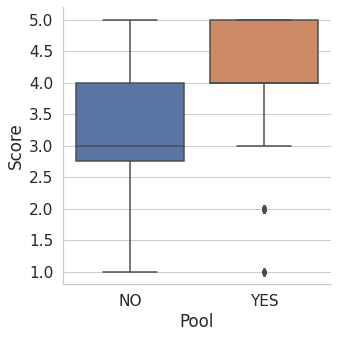

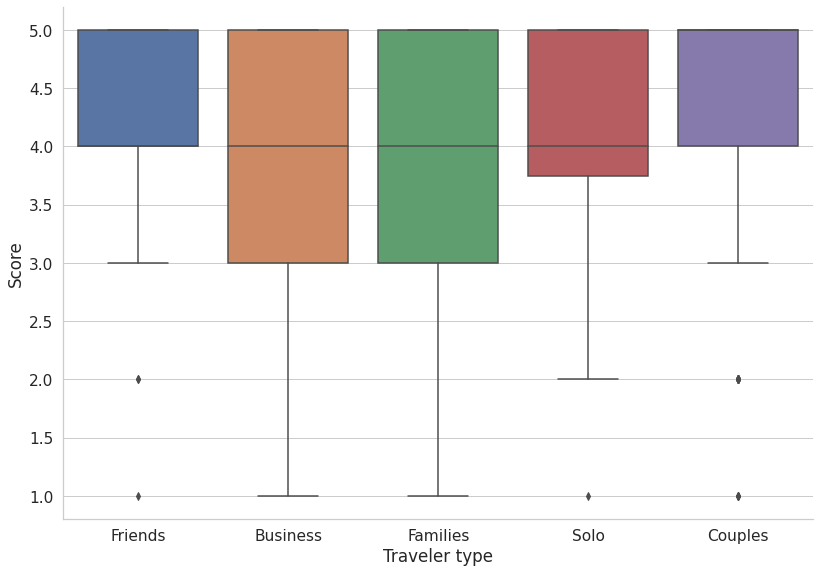

In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(11.7,8.27)})

reviews = pd.read_csv('lasvegas_tripadvisor.csv')
print(reviews["Score"].value_counts())

sns.set(font_scale=1.4)
sns.set_style("whitegrid")
sns.catplot(x="Pool", y="Score", data=reviews, kind="box")
plt.show()

sns.catplot(x="Traveler type", y="Score", data=reviews, kind="box", height=8.27, aspect=11.7/8.27)
plt.show()

### ***Creating a box plot***

When people leave reviews for products, services, or destinations, people reading those reviews can sometimes mark the original review as helpful. If enough people mark the review as helpful, future readers of these reviews might be more likely to trust the content of the original review.

Using the reviews dataset, explore the continuous variable `"Helpful votes"` across the different categories found in the `"Traveler type"` variable.


* Set the font size of your graphic to be `1.25`.
* Set the background of the graphic to be `"darkgrid"`.
* Create a boxplot using **`catplot()`** with `"Helpful votes"` as the continuous variable split across each `"Traveler type"`. Make sure that you are using the `reviews` dataset.

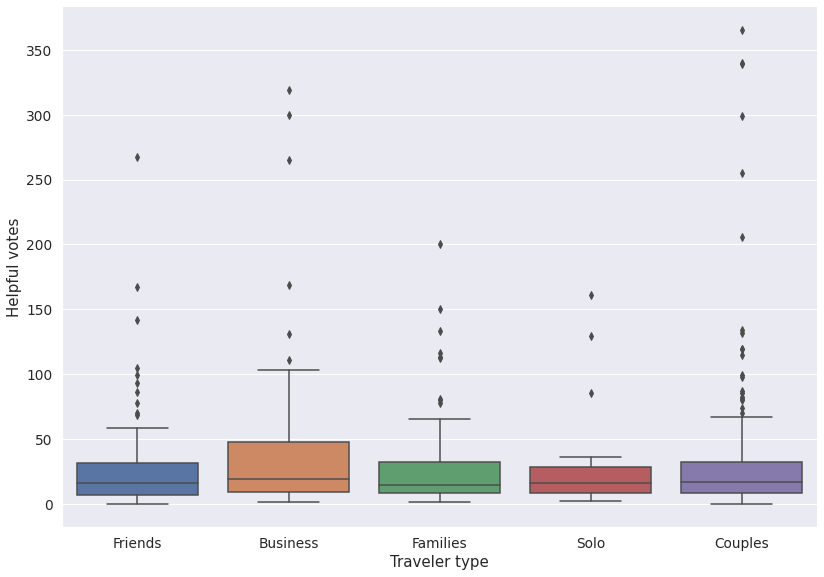

In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(11.7,8.27)})

reviews = pd.read_csv('lasvegas_tripadvisor.csv')

sns.set(font_scale=1.25)

# Set the background to "darkgrid"
sns.set_style('darkgrid')

# Create a boxplot
sns.catplot(x='Traveler type', y='Helpful votes', data=reviews, kind='box', height=8.27, aspect=11.7/8.27)

plt.show()

It looks like business travelers have left the most helpful reviews, although there are a few reviews by couples that have been really helpful to others.

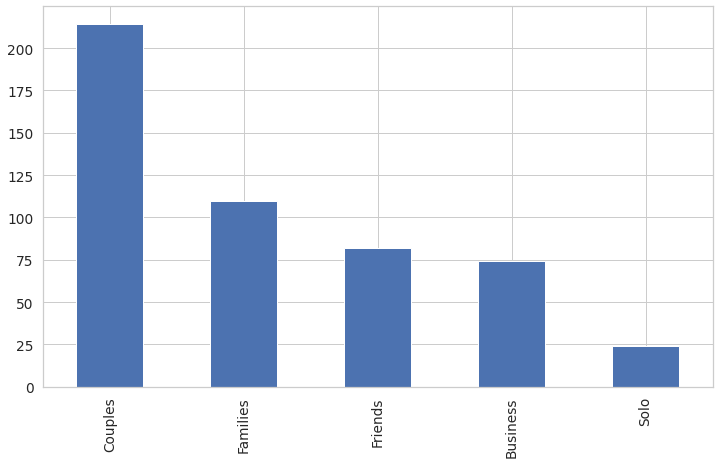

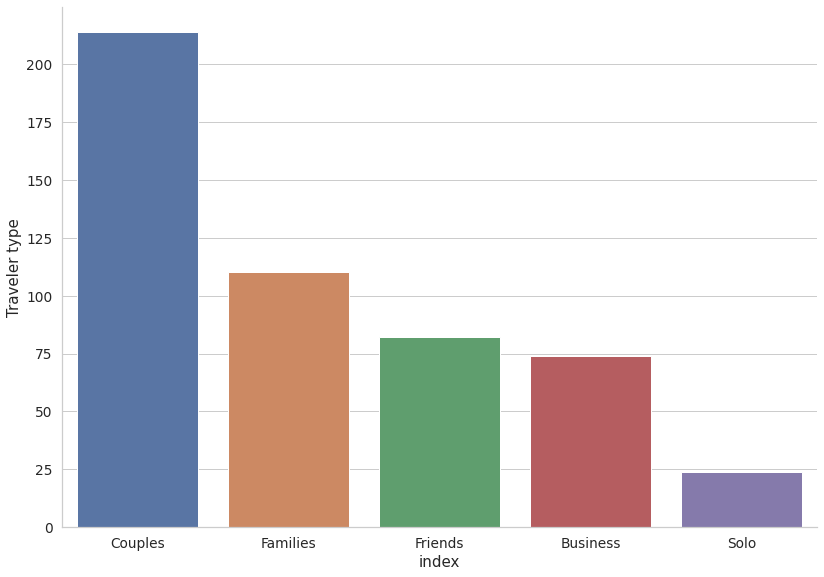

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(11.7,8.27)})

reviews = pd.read_csv('lasvegas_tripadvisor.csv')

sns.set(font_scale=1.25)
sns.set_style('whitegrid')

reviews["Traveler type"].value_counts().plot.bar(figsize=(12,7))
plt.show()

freq = reviews["Traveler type"].value_counts().reset_index()

sns.catplot(y="Traveler type", x="index", data=freq, kind="bar", height=8.27, aspect=11.7/8.27)
plt.show()

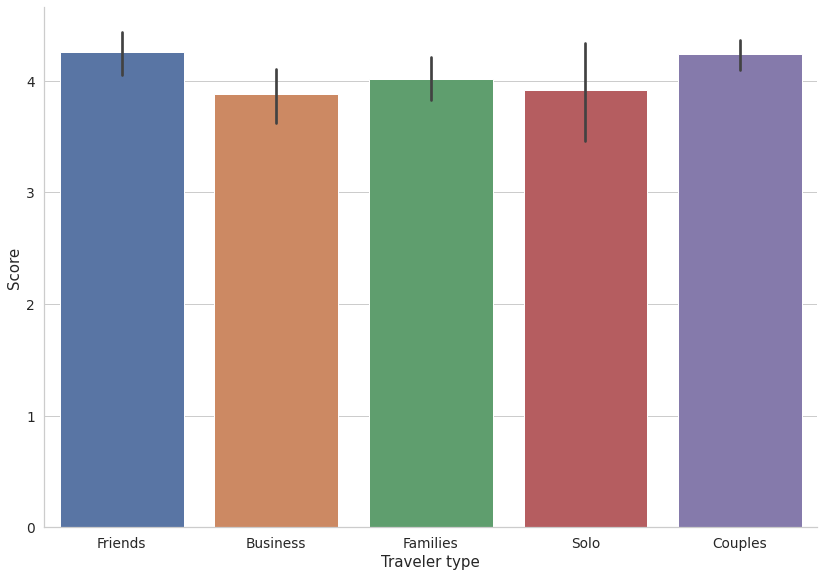

In [10]:
sns.catplot(x="Traveler type", y="Score", data=reviews, kind="bar", height=8.27, aspect=11.7/8.27)
plt.show()

* เส้นสีดำ แสดงถึง ช่วงความเชื่อมั่น

# ***Ordering your categories***

* ควรทำก่อน plot

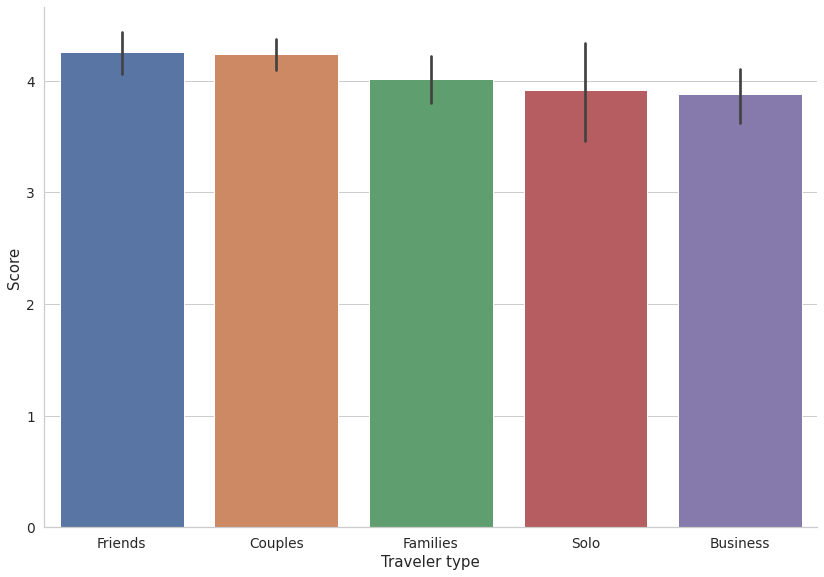

In [14]:
reviews["Traveler type"] = pd.Categorical(reviews["Traveler type"], categories=['Friends', 'Couples', 'Families', 'Solo', 'Business'], ordered=False)
reviews["Traveler type"].cat.categories

sns.catplot(x="Traveler type", y="Score", data=reviews, kind="bar", height=8.27, aspect=11.7/8.27)
plt.show()

# ***The `hue` parameter***

* Split the data by a second category
  * สมมติอยากพล็อตให้แกนนอนเป็น `Traveler Type` แกนตั้งเป็น `Score` และ `hue` เป็น `Tennis court`

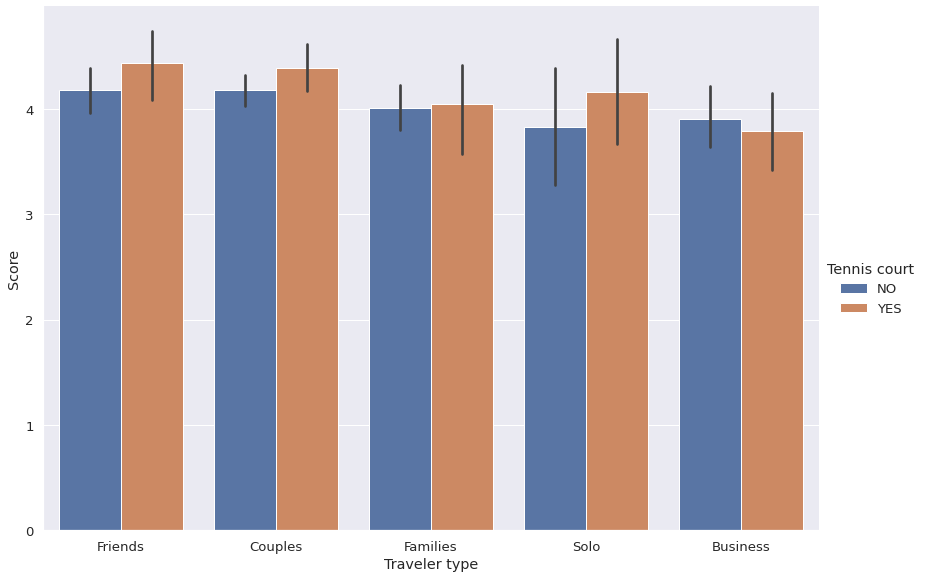

In [15]:
sns.set(font_scale=1.2)
sns.set_style("darkgrid")
sns.catplot(x="Traveler type", y="Score", data=reviews, kind="bar", hue="Tennis court", height=8.27, aspect=11.7/8.27)
plt.show()

### ***Creating a bar plot***

Las Vegas hotels are seeing large variations in how helpful reviews appear to other people. The owners of these hotels are curious if there are times of the year when reviews have been more helpful to their potential guests. Help the owners understand their reviews better by creating a bar plot of the average number of helpful votes per review across the categorical variable `"Period of stay"`. 

* Print out the frequency counts of the variable `"Period of stay"` to make sure each category has data.
* Create a bar plot using **`.catplot()`**.
* Split the reviews dataset on `"Period of stay"` across the x-axis.
* Specify the numerical variable to aggregate on as `"Helpful votes"`.

Mar-May    128
Jun-Aug    126
Sep-Nov    126
Dec-Feb    124
Name: Period of stay, dtype: int64


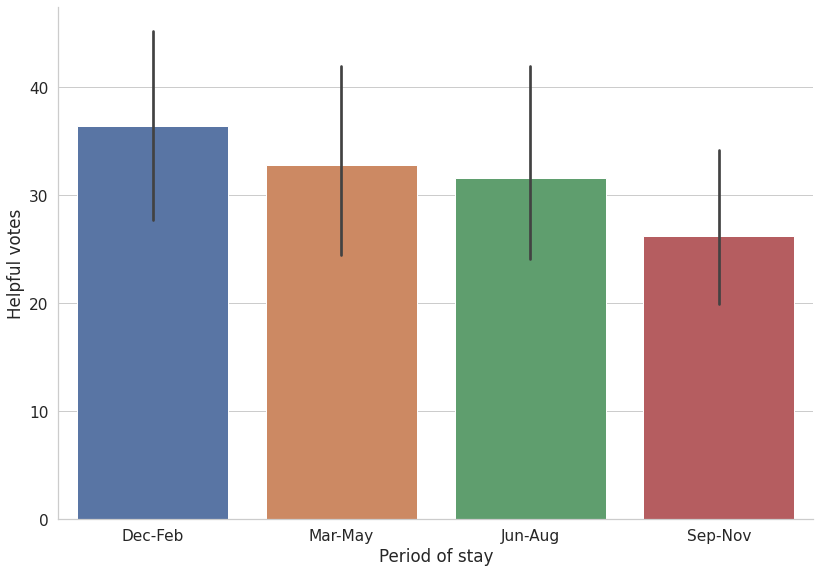

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

reviews = pd.read_csv('lasvegas_tripadvisor.csv')

# Print the frequency counts of "Period of stay"
print(reviews['Period of stay'].value_counts())

sns.set(font_scale=1.4)
sns.set_style("whitegrid")

# Create a bar plot of "Helpful votes" by "Period of stay"
sns.catplot(x='Period of stay', y='Helpful votes', data=reviews, kind='bar', height=8.27, aspect=11.7/8.27)
plt.show()

It also looks like potential guests find reviews from December-February to be the most helpful, while reviews from September-November appear to be the least helpful.

### ***Ordering categories***

Not all categories are created equal. In the hotel review dataset, `reviews`, hotel owners know that most of their customers are from North America. When visualizing data broken out by `"User continent"` they might want North America to appear first. An ordered list of user continents has been provided as `continent_categories`. In this exercise, you will work through preparing a visualization that is ordered by the frequency counts of a Series.

* Create a bar chart with `"User continent"` along the x-axis and `"Score"` along the y-axis.
* Print out the frequency counts of `"User continent"`.
* Convert the `"User continent"` Series to a categorical and create a bar plot with `"User continent"` along the x-axis.
* Reorder the `"User continent"` Series using the `ordered` list, `continent_categories`, and rerun the graphic.

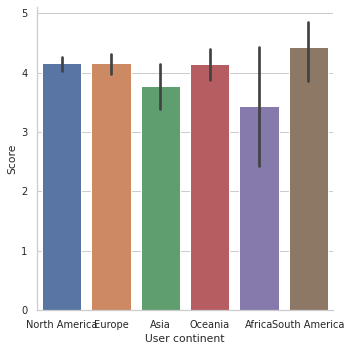

North America    295
Europe           118
Oceania           41
Asia              36
Africa             7
South America      7
Name: User continent, dtype: int64


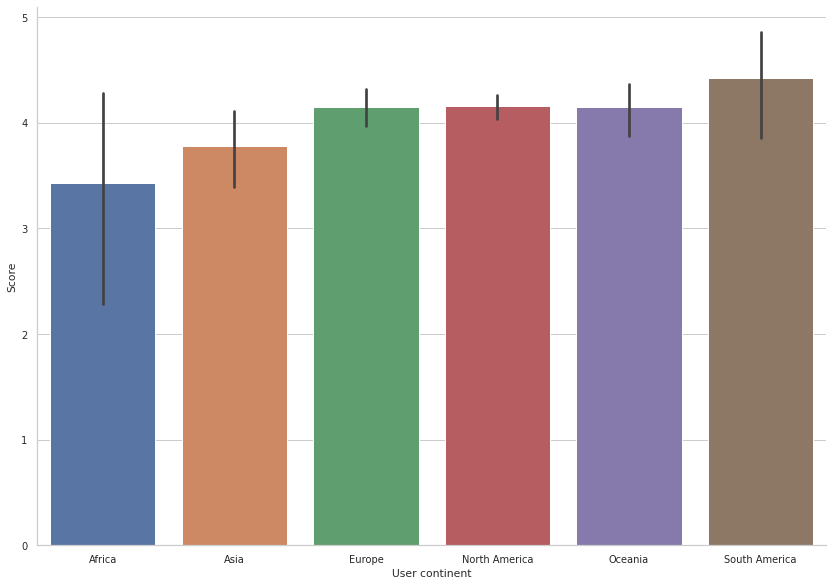

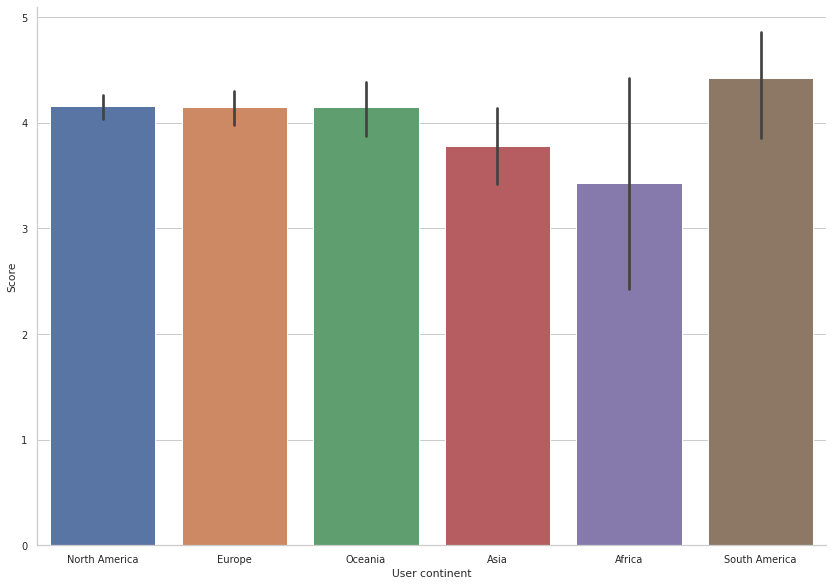

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

reviews = pd.read_csv('lasvegas_tripadvisor.csv')

# Create a bar chart
sns.set(font_scale=.9)
sns.set_style("whitegrid")
sns.catplot(x='User continent', y='Score', data=reviews, kind='bar')
plt.show()

# Print the frequency counts for "User continent"
print(reviews['User continent'].value_counts())

# Convert "User continent" to a categorical variable
reviews["User continent"] = reviews["User continent"].astype('category')
sns.catplot(x='User continent', y="Score", data=reviews, kind="bar", height=8.27, aspect=11.7/8.27)
plt.show()

# Reorder "User continent" using continent_categories and rerun the graphic
continent_categories = list(reviews["User continent"].value_counts().index)
reviews["User continent"] = reviews["User continent"].cat.reorder_categories(new_categories=continent_categories)
sns.catplot(x="User continent", y="Score", data=reviews, kind="bar", height=8.27, aspect=11.7/8.27)
plt.show()

Notice that the confidence intervals are smaller for continents with more reviews.

### ***Bar plot using hue***

Aggregating information across multiple categories is often necessary to help stakeholders better understand their data. In preparation for building a dashboard that will allow users to select up to two variables when creating visualizations, you want to test visualizations that use different combinations of categorical variables using a bar plot.

* Update the plot so that `"Casino"` (along the x-axis) and `"Free internet"` (to color the bars) are used to split the data.
* Switch the categories so that `"Free internet"` is on the x-axis and `"Casino"` is in the legend.
* Update the x parameter to be `"User continent"`.

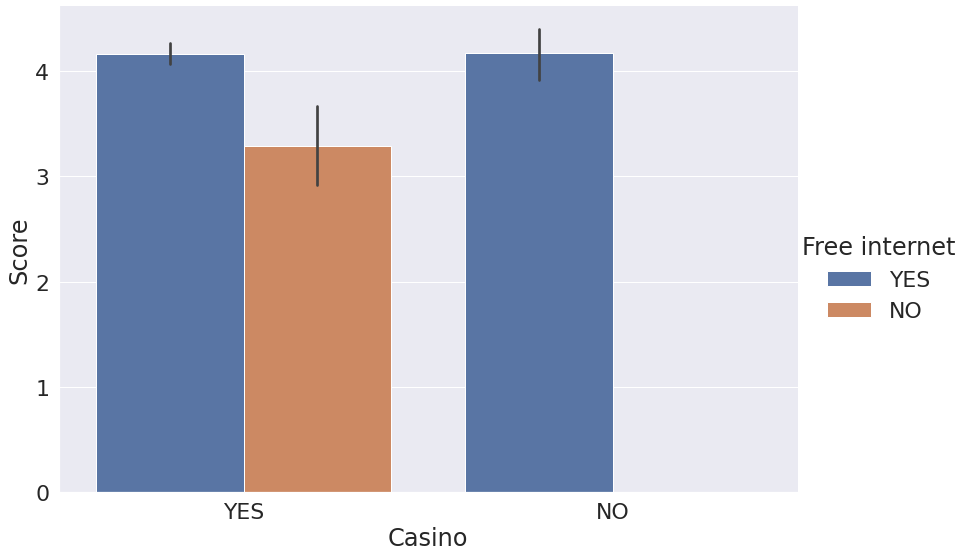

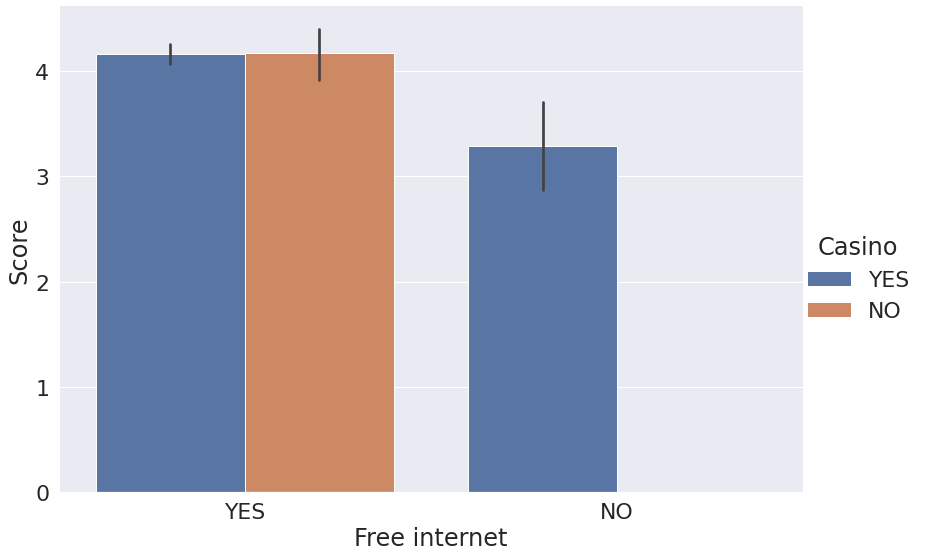

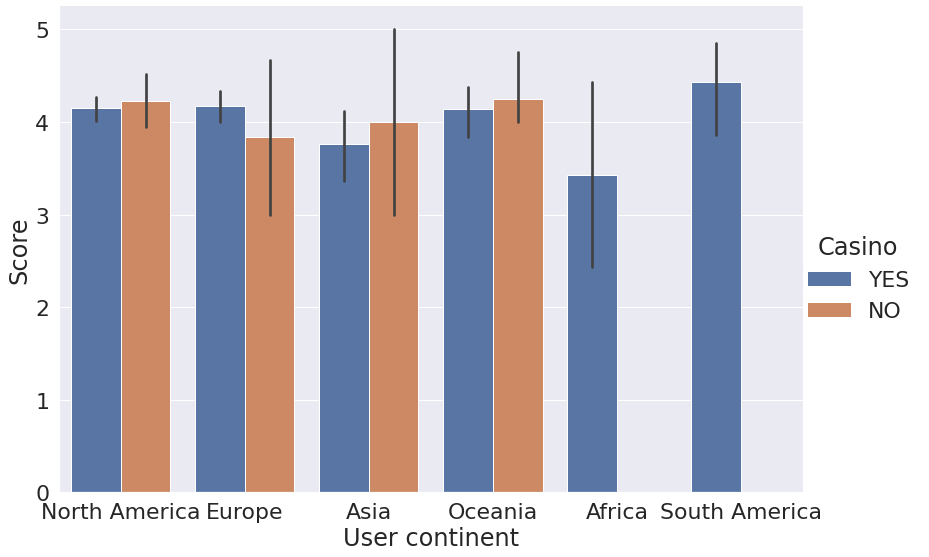

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

reviews = pd.read_csv('lasvegas_tripadvisor.csv')

# Add a second category to split the data on: "Free internet"
sns.set(font_scale=2)
sns.set_style("darkgrid")
sns.catplot(x='Casino', y="Score", data=reviews, kind="bar", hue='Free internet', height=8.27, aspect=11.7/8.27)
plt.show()


# Switch the x and hue categories
sns.set(font_scale=2)
sns.set_style("darkgrid")
sns.catplot(x='Free internet', y="Score", data=reviews, kind="bar", hue='Casino', height=8.27, aspect=11.7/8.27)
plt.show()

# Update x to be "User continent"
sns.set(font_scale=2)
sns.set_style("darkgrid")
sns.catplot(x='User continent', y="Score", data=reviews, kind="bar", hue="Casino", height=8.27, aspect=11.7/8.27)
plt.show()







# ***Point plot example***

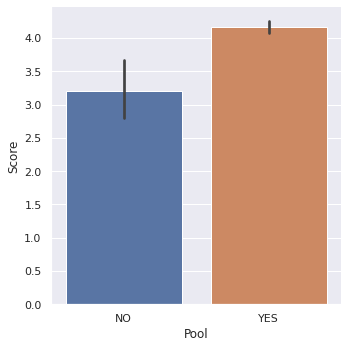

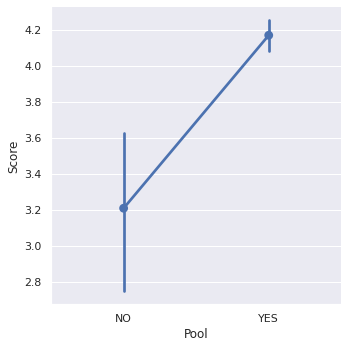

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

reviews = pd.read_csv('lasvegas_tripadvisor.csv')

sns.catplot(x="Pool", y="Score", data=reviews, kind="bar")
sns.catplot(x="Pool", y="Score", data=reviews, kind="point")
plt.show()

# ***Point plot with hue***

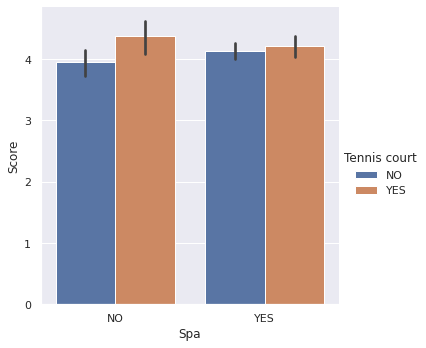

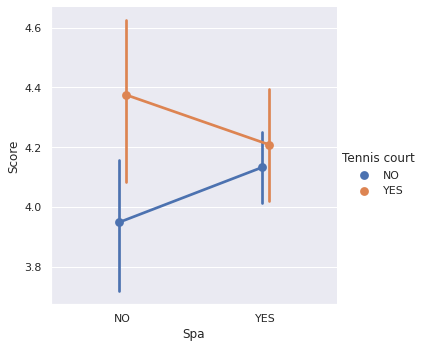

In [10]:
sns.catplot(x="Spa", y="Score", data=reviews, kind="bar", hue="Tennis court")
sns.catplot(x="Spa", y="Score", data=reviews, kind="point", hue="Tennis court", dodge=True)
plt.show()

# ***Using the join parameter***

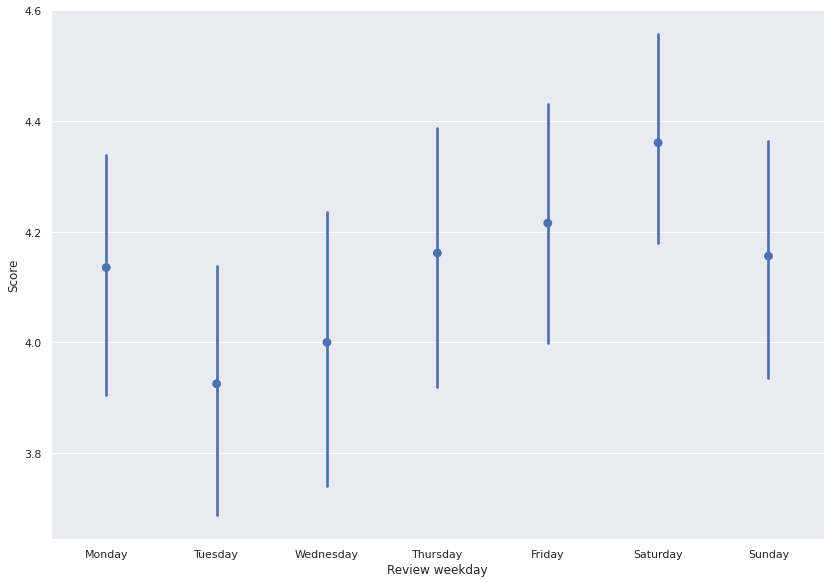

In [15]:
reviews['Review weekday'] = reviews['Review weekday'].astype('category')
reviews['Review weekday'] = reviews['Review weekday'].cat.reorder_categories(new_categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

sns.catplot(y="Score", x="Review weekday", data=reviews, kind="point", join=False, height=8.27, aspect=11.7/8.27)
plt.show()

# ***Count plot*** มันคือการเอา **`.value_counts()`** มาพล็อต

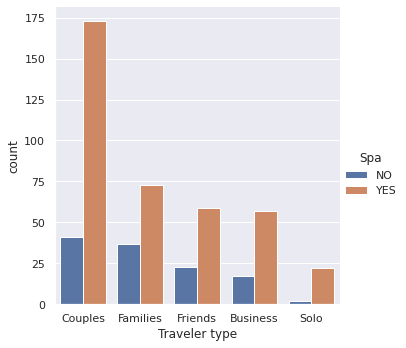

In [23]:
sns.catplot(x="Traveler type", data=reviews, kind="count", order= ['Couples', 'Families', 'Friends', 'Business', 'Solo'], hue="Spa")
plt.show()

### ***Creating a point plot***

Creating helpful visualizations sometimes requires a lot of testing. You have been asked to create a visualization that shows the number of reviews, `"Nr. reviews"`, which is the number of reviews a reviewer has previously written, across a hotel's star rating, `"Hotel stars"`. Since the number of reviews is numerical, you have decided to use a point plot to show the mean of the data across the categories.


* Using the **`catplot()`** function, create a point plot.
* Split the data across the x-axis using `"Hotel stars"`.
* Specify the numerical variable to visualize to `"Nr. reviews"`.
* Update the arguments so that any lines that appear do not overlap.

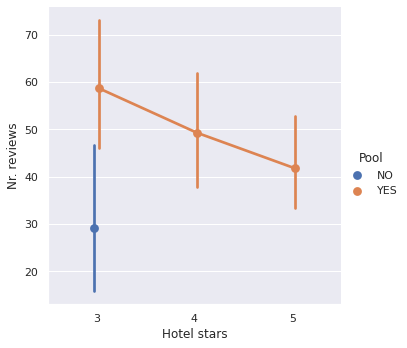

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

reviews = pd.read_csv('lasvegas_tripadvisor.csv')

# Create a point plot with catplot using "Hotel stars" and "Nr. reviews"
sns.catplot(x='Hotel stars', y='Nr. reviews', data=reviews, kind='point',  hue="Pool",  dodge=True)
plt.show()

Although it is great to see big differences in the average number of previous reviews across the different hotel star ratings for hotels with a pool, there aren't enough 4 and 5 star hotels without a pool to display any information. We might want to find a different category for the hue parameter here or just show the `'Nr. of reviews'` across the different hotel star ratings.

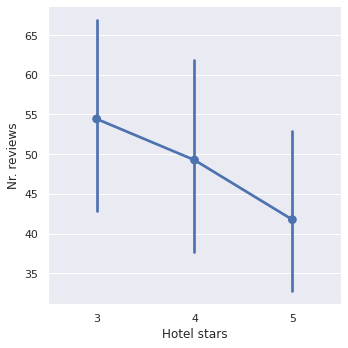

In [25]:
sns.catplot(x='Hotel stars', y='Nr. reviews', data=reviews, kind='point',  dodge=True)
plt.show()

### ***Creating a count plot***

When creating quick analysis of frequency counts, you have been using **`.value_counts()`**. This is a great way for you to see the counts and get an idea of which categories are present in the data. However, sending frequency tables to clients or coworkers may not always be a good idea. For this exercise, you will visualize the number of reviews by their `"Score"`. Although `"Score"` has been used as a numerical variable in the past, it can be used as a categorical variable given that it has five unique values that are ordered from worst to best. The reviews dataset has been preloaded.

* Use the **`catplot()`** function to display count frequencies using the `reviews` dataset.
* Count the frequencies for the `"Score"` variable across the x-axis.
* When counting the frequencies, color the bars using the `"Traveler type"` column.

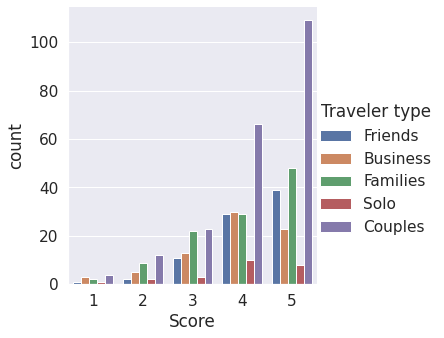

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

reviews = pd.read_csv('lasvegas_tripadvisor.csv')

sns.set(font_scale=1.4)
sns.set_style("darkgrid")

# Create a catplot that will count the frequency of "Score" across "Traveler type"
sns.catplot(
  x='Score', kind='count', hue='Traveler type', data=reviews
)
plt.show()

The couples Traveler type and a score of 5 were the most common values found in the data. 

# ***Using the `catplot()` facetgrid***

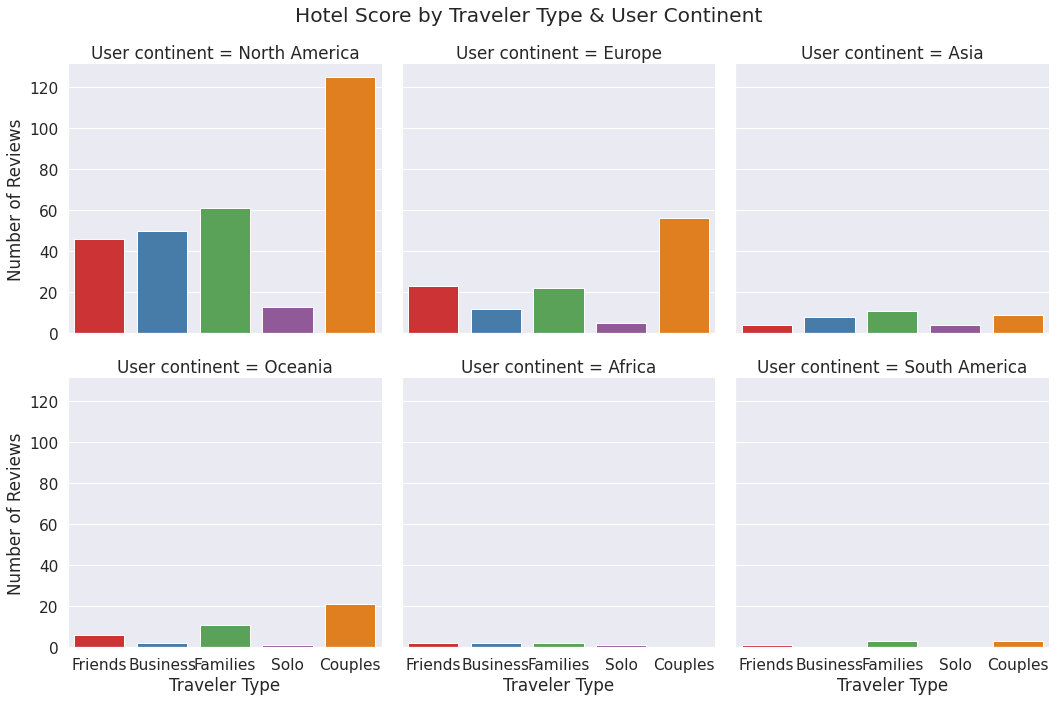

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

reviews = pd.read_csv('lasvegas_tripadvisor.csv')

sns.set(font_scale=1.4)
sns.set_style("darkgrid")

ax = sns.catplot(x="Traveler type", kind="count", col="User continent", col_wrap=3, palette=sns.color_palette("Set1"), data=reviews)
ax.fig.suptitle("Hotel Score by Traveler Type & User Continent")
ax.set_axis_labels("Traveler Type", "Number of Reviews")
plt.subplots_adjust(top=.9)
plt.show()

### ***One visualization per group***

While working on a data exploration project, you have been asked to visualize the number of reviews of hotels by `"Period of stay"` and by the day of the week, `"Review weekday"`. The goal of this visualization is to see what day of the week has the most reviews for each of the four periods of stay. 

* Create a `catplot()` using `"count"` as the type of graphic.
* Count the number of `reviews` by `"Review weekday"`.
* Create individual plots for each `"Period of stay"`.
* Wrap the plots after every 2nd graphic.

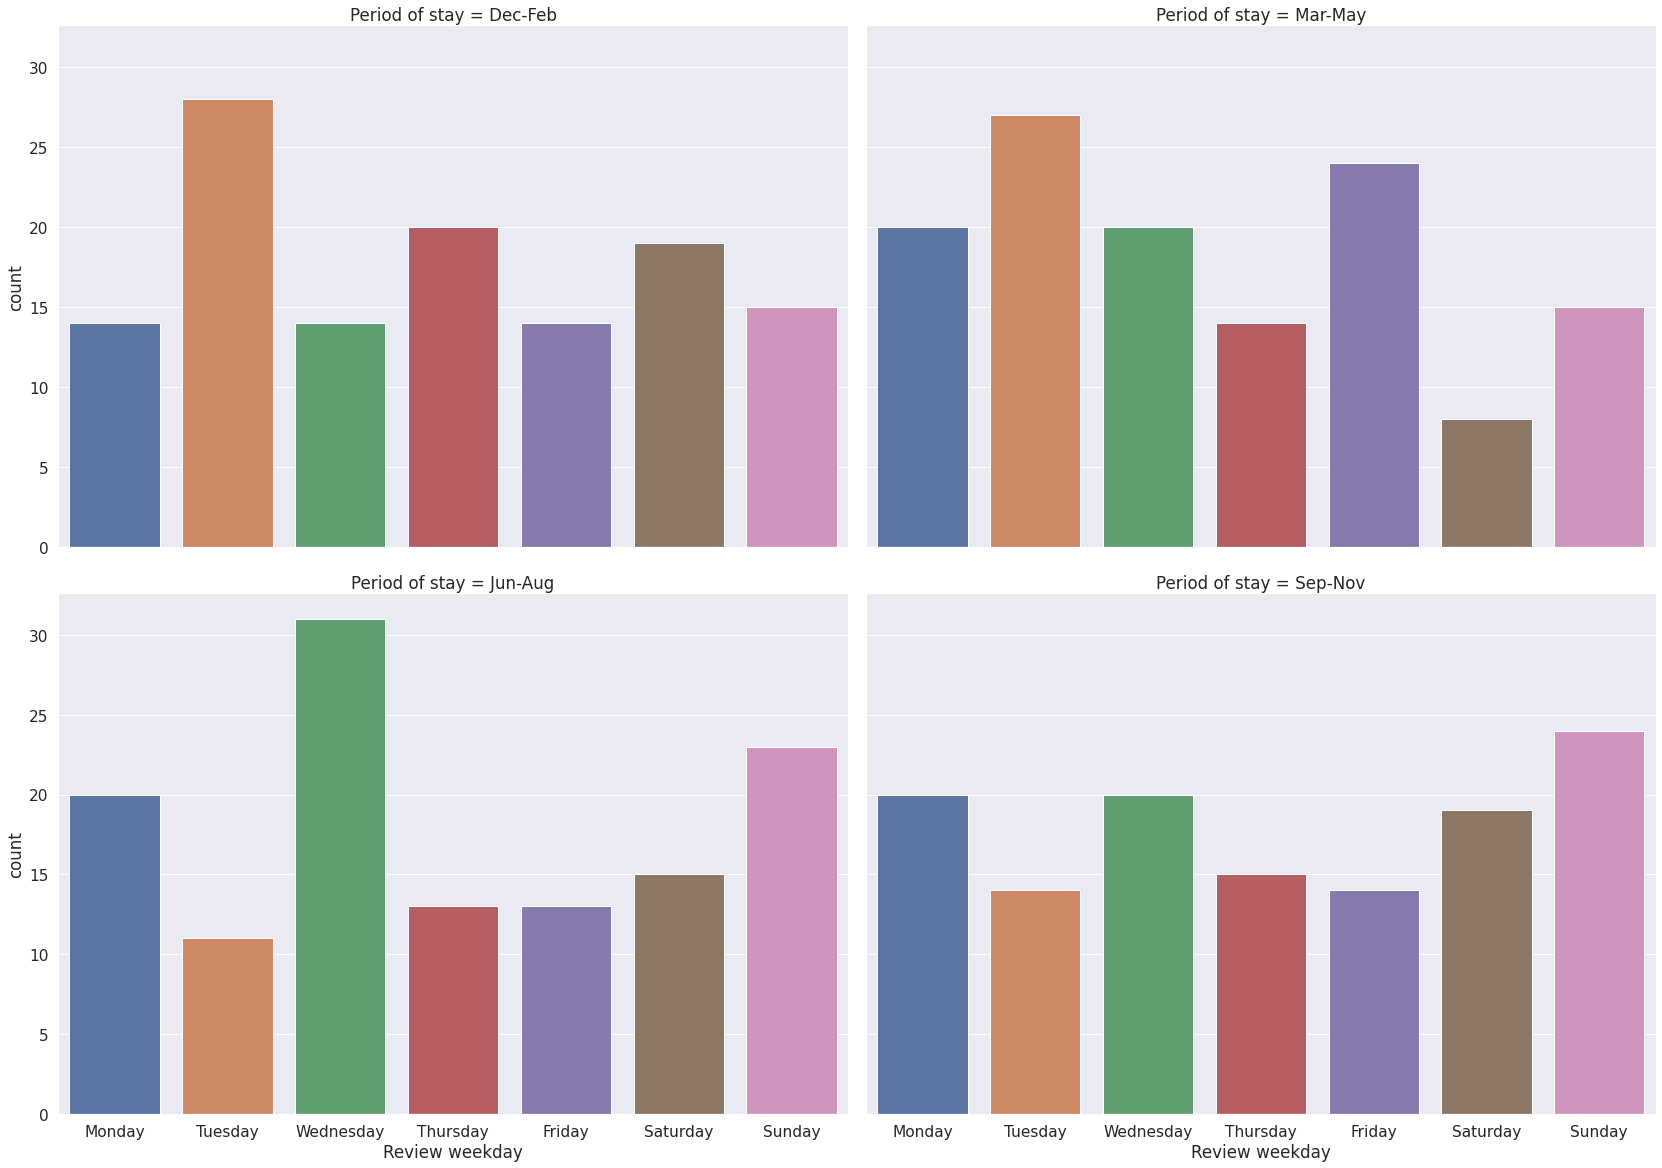

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

reviews = pd.read_csv('lasvegas_tripadvisor.csv')

reviews['Review weekday'] = reviews['Review weekday'].astype('category')
reviews['Review weekday'] = reviews['Review weekday'].cat.reorder_categories(new_categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Create a catplot for each "Period of stay" broken down by "Review weekday"
ax = sns.catplot(
  # Make sure Review weekday is along the x-axis
  x='Review weekday',
  # Specify Period of stay as the column to create individual graphics for
  col='Period of stay',
  # Specify that a count plot should be created
  kind='count',
  # Wrap the plots after every 2nd graphic.
  col_wrap=2,
  data=reviews, height=8.27, aspect=11.7/8.27)

plt.show()

Did you notice that Tuesday was the most common review day for December through May, but one of the least common days for June through November?

### ***Updating categorical plots***

Hotels are constantly working to get better reviews from their customers. A hotel chain has asked you to create visualizations to help the company understand why people might provide various ratings after staying at their hotels. A manager has asked if hotels with `"Free internet"` receive higher reviews given the `"Traveler type"`.

Creating visualizations is an iterative process. In this exercise, you will start with a basic graphic and iteratively add features until you have a finished product. 

* Adjust the color of the plot to be seaborn's `"Set2"` palette.
* Add the title `"Hotel Score by Traveler Type and Free Internet Access"`
* Update the axis labels to be `"Free Internet"` for the x-axis and `"Average Review Rating"` for the y-axis.
* Adjust the starting height of the graphic to be 93% of the full visualization height.

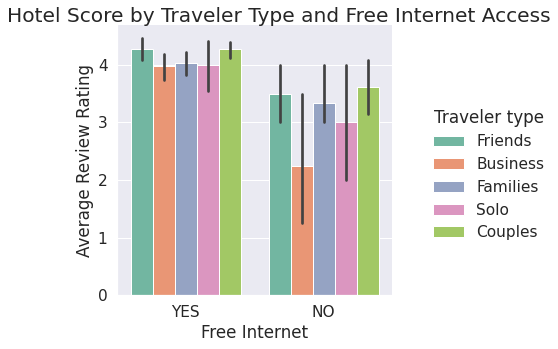

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

reviews = pd.read_csv('lasvegas_tripadvisor.csv')

# Adjust the color
ax = sns.catplot(
  x="Free internet", y="Score",
  hue="Traveler type", kind="bar",
  data=reviews,
  palette=sns.color_palette("Set2")
)

# Add a title
ax.fig.suptitle("Hotel Score by Traveler Type and Free Internet Access")
# Update the axis labels
ax.set_axis_labels("Free Internet", "Average Review Rating")

# Adjust the starting height of the graphic
plt.subplots_adjust(top=0.93)
plt.show()

It looks like free internet really makes a difference, especially for business-related travelers.

### ***Overcoming pitfalls: string issues***

* Print the frequency table of the `"body_type"` column for `used_cars` and include `NaN` values.
* Update the `.loc` statement so that all `NaN` values in `"body_type"` are set to `"other"`.
* Convert the `"body_type"` column to title case.
* Check the dtype of the `"body_type"` column.

In [8]:
import pandas as pd

used_cars = pd.read_csv('cars.csv')

# Print the frequency table of body_type and include NaN values
print(used_cars["body_type"].value_counts(dropna=False))

# Update NaN values
used_cars.loc[used_cars["body_type"].isna(), "body_type"] = "other"

# Convert body_type to title case
used_cars["body_type"] = used_cars["body_type"].str.title()

# Check the dtype
print(used_cars["body_type"].dtype)

sedan        5886
hatchback    4969
universal    3772
minivan      2693
suv          2031
minibus       916
van           423
coupe         248
liftback      235
pickup         72
cabriolet      30
limousine       2
Name: body_type, dtype: int64
object


Categorical Series can be tricky. When in doubt, check the changes you have made and convert back to a categorical Series if needed.

### ***Overcoming pitfalls: using numpy arrays***

A local used car company manually appraises each car that they add to their inventory. When a new car comes in, they select from a drop-down menu, giving the car a rating between 1 and 5. A 1 means that the car probably won't sell as is, but a 5 indicates the car will definitely sell without a problem.

With over 38,000 cars in their inventory, the company has asked you to give them an average "sellability" of their cars. For this exercise, use the `used_cars` dataset. The column of interest is called `"Sale Rating"` and it is currently a categorical column.


* Print the frequency table of the `"Sale Rating"` column of the `used_cars` dataset.
* Correct the second statement by converting the column to type `int` before calling `.mean()`.

In [ ]:
#### DON'T RUN.  THIS ONE IS STRAIGTFORWARD SO I DIDN'T COPY THE DATA.

# Print the frequency table of Sale Rating
print(used_cars["Sale Rating"].value_counts())

# Find the average score
average_score = used_cars["Sale Rating"].astype('int').mean()

# Print the average
print(average_score)

# ***Label encoding***

* Codes each category as an integer from `0` through `n - 1`, where `n` is the number of categories
* A `-1` code is reserved for any missing values

# ***Creating a code book***



In [1]:
import pandas as pd

used_cars = pd.read_csv('cars.csv')

used_cars['manufacturer_name'] = used_cars['manufacturer_name'].astype('category')
codes = used_cars['manufacturer_name'].cat.codes
categories = used_cars['manufacturer_name']
name_map = dict(zip(codes, categories))
print(name_map)

{45: 'Subaru', 24: 'LADA', 12: 'Dodge', 54: 'УАЗ', 23: 'Kia', 35: 'Opel', 53: 'Москвич', 1: 'Alfa Romeo', 0: 'Acura', 10: 'Dacia', 27: 'Lexus', 33: 'Mitsubishi', 25: 'Lancia', 9: 'Citroen', 32: 'Mini', 21: 'Jaguar', 38: 'Porsche', 44: 'SsangYong', 11: 'Daewoo', 15: 'Geely', 50: 'ВАЗ', 13: 'Fiat', 14: 'Ford', 39: 'Renault', 42: 'Seat', 40: 'Rover', 48: 'Volkswagen', 28: 'Lifan', 22: 'Jeep', 5: 'Cadillac', 2: 'Audi', 52: 'ЗАЗ', 47: 'Toyota', 51: 'ГАЗ', 49: 'Volvo', 7: 'Chevrolet', 16: 'Great Wall', 4: 'Buick', 37: 'Pontiac', 29: 'Lincoln', 18: 'Hyundai', 34: 'Nissan', 46: 'Suzuki', 3: 'BMW', 30: 'Mazda', 26: 'Land Rover', 20: 'Iveco', 43: 'Skoda', 41: 'Saab', 19: 'Infiniti', 6: 'Chery', 17: 'Honda', 31: 'Mercedes-Benz', 36: 'Peugeot', 8: 'Chrysler'}


# ***Using a code book***

* Creating the codes:

In [7]:
used_cars['manufacturer_code'] = used_cars['manufacturer_name'].cat.codes
used_cars['manufacturer_code'].unique()

array([45, 24, 12, 54, 23, 35, 53,  1,  0, 10, 27, 33, 25,  9, 32, 21, 38,
       44, 11, 15, 50, 13, 14, 39, 42, 40, 48, 28, 22,  5,  2, 52, 47, 51,
       49,  7, 16,  4, 37, 29, 18, 34, 46,  3, 30, 26, 20, 43, 41, 19,  6,
       17, 31, 36,  8], dtype=int8)

# ***Reverting to previous values:***

In [8]:
used_cars['manufacturer_code'].map(name_map).unique()

array(['Subaru', 'LADA', 'Dodge', 'УАЗ', 'Kia', 'Opel', 'Москвич',
       'Alfa Romeo', 'Acura', 'Dacia', 'Lexus', 'Mitsubishi', 'Lancia',
       'Citroen', 'Mini', 'Jaguar', 'Porsche', 'SsangYong', 'Daewoo',
       'Geely', 'ВАЗ', 'Fiat', 'Ford', 'Renault', 'Seat', 'Rover',
       'Volkswagen', 'Lifan', 'Jeep', 'Cadillac', 'Audi', 'ЗАЗ', 'Toyota',
       'ГАЗ', 'Volvo', 'Chevrolet', 'Great Wall', 'Buick', 'Pontiac',
       'Lincoln', 'Hyundai', 'Nissan', 'Suzuki', 'BMW', 'Mazda',
       'Land Rover', 'Iveco', 'Skoda', 'Saab', 'Infiniti', 'Chery',
       'Honda', 'Mercedes-Benz', 'Peugeot', 'Chrysler'], dtype=object)

# ***Boolean coding using `np.where()`***

In [9]:
import numpy as np

used_cars["van_code"] = np.where(used_cars["body_type"].str.contains("van", regex=False), 1, 0)
used_cars["van_code"].value_counts()

0    34115
1     4416
Name: van_code, dtype: int64

### ***Create a label encoding and map***

A used car company believes that they can predict a car's sales price reasonably well using their `used_cars` dataset. One of the variables they want to use, `"color"`, needs to be converted to codes. The company believes that a car's color will be important when predicting sales price.

* Convert the color column to a categorical Series.
* Create a new column, `"color_code"`, by creating a label encoding for the variable `"color"`.
* Before you forget which codes belong to which categories, create a color map using the `codes` and `categories` objects.
* Print the new `color map to see which codes map to which categories.

In [10]:
import pandas as pd

used_cars = pd.read_csv('cars.csv')

# Convert to categorical and print the frequency table
used_cars["color"] = used_cars["color"].astype("category")
print(used_cars["color"].value_counts())

# Create a label encoding
used_cars["color_code"] = used_cars["color"].cat.codes

# Create codes and categories objects
codes = used_cars["color"].cat.codes
categories = used_cars["color"]
color_map = dict(zip(codes, categories))

# Print the map
print(color_map)

black     7705
silver    6852
blue      5802
white     4212
grey      3751
red       2925
green     2760
other     2688
brown      886
violet     463
yellow     303
orange     184
Name: color, dtype: int64
{8: 'silver', 1: 'blue', 7: 'red', 0: 'black', 4: 'grey', 6: 'other', 2: 'brown', 10: 'white', 3: 'green', 9: 'violet', 5: 'orange', 11: 'yellow'}


### ***Using saved mappings***

You are using a subset of a dataset and have been asked to create visualizations summarizing the output. As the dataset currently stands, all you see are numbers! Luckily, you had created and saved dictionaries (`color_map`, `fuel_map`, and `transmission_map`) that will map these columns back to their original categorical names. 

* Update the `"color"` column back to its original values using the `color_map` dictionary.
* Update the `"engine_fuel"` column back to its original values using the `fuel_map` dictionary.
* Update the `"transmission"` column back to its original values using the `transmission_map` dictionary.
* Use .info() on the dataset to see if the `dtypes` have changed.

In [20]:
import pandas as pd

used_cars = pd.read_csv('cars.csv')
used_cars_updated = pd.DataFrame()
used_cars_updated['engine_fuel'] = used_cars['engine_fuel'].astype('category').cat.codes
used_cars_updated['color'] = used_cars['color'].astype('category').cat.codes
used_cars_updated['transmission'] = used_cars['transmission'].astype('category').cat.codes
used_cars_updated['price_usd'] = used_cars['price_usd']
print(used_cars_updated.dtypes)
color_map = dict(zip(used_cars_updated['engine_fuel'], used_cars['engine_fuel']))
fuel_map = dict(zip(used_cars_updated['color'], used_cars['color']))
transmission_map = dict(zip(used_cars_updated['transmission'], used_cars['transmission']))


engine_fuel        int8
color              int8
transmission       int8
price_usd       float64
dtype: object


### ***Creating a Boolean encoding***

In preparation for running machine learning models to estimate the sale price of used cars, you are starting to analyze the available columns of the `used_cars` dataset and want to create columns that can be used in training. One of the managers of a used car dealership has said that the manufacturer of the car is the most important aspect he considers when setting prices. You will begin by exploring the `manufacturer_name` column.

* Print the frequency table of the `"manufacturer_name"` column.
* Create a column, `"is_volkswagen"`, that is `True` when `"manufacturer_name"` contains `"Volkswagen"` and `False` otherwise.
* Update the code so that a `1` is used instead of `True` and a `0` is used instead of `False` so Python can use this column in algorithms.
* Print out a frequency table for the newly created column.



In [21]:
import pandas as pd

used_cars = pd.read_csv('cars.csv')

# Print the "manufacturer_name" frequency table.
print(used_cars["manufacturer_name"].value_counts())

# Create a Boolean column for the most common manufacturer name
used_cars["is_volkswagen"] = np.where(
  used_cars["manufacturer_name"].str.contains("Volkswagen", regex=False), 1, 0
)
  
# Check the final frequency table
print(used_cars["is_volkswagen"].value_counts())

Volkswagen       4243
Opel             2759
BMW              2610
Ford             2566
Renault          2493
Audi             2468
Mercedes-Benz    2237
Peugeot          1909
Citroen          1562
Nissan           1361
Mazda            1328
Toyota           1246
Hyundai          1116
Skoda            1089
Kia               912
Mitsubishi        887
Fiat              824
Honda             797
Volvo             721
ВАЗ               481
Chevrolet         436
Chrysler          410
Seat              303
Dodge             297
Subaru            291
Rover             235
Suzuki            234
Daewoo            221
Lexus             213
Alfa Romeo        207
ГАЗ               200
Land Rover        184
Infiniti          162
LADA              146
Iveco             139
Saab              108
Jeep              107
Lancia             92
SsangYong          79
УАЗ                74
Geely              71
Mini               68
Acura              66
Porsche            61
Dacia              59
Chery     

# ***One-hot encoding with pandas***

**`pd.get_dummies()`**

* **`data`** : a pandas DataFrame
* **`columns`** : a list-like object of column names
* **`prefix`** : a string to add to the beginning of each category

Example:


In [27]:
import pandas as pd

used_cars = pd.read_csv('cars.csv')

print(used_cars[["odometer_value", "color"]].head())
print(used_cars['color'].unique())

used_cars_onehot = pd.get_dummies(used_cars[["odometer_value", "color"]])
used_cars_onehot.head()

   odometer_value   color
0          190000  silver
1          290000    blue
2          402000     red
3           10000    blue
4          280000   black
['silver' 'blue' 'red' 'black' 'grey' 'other' 'brown' 'white' 'green'
 'violet' 'orange' 'yellow']


,odometer_value,color_black,color_blue,color_brown,color_green,color_grey,color_orange,color_other,color_red,color_silver,color_violet,color_white,color_yellow
0,190000,0,0,0,0,0,0,0,0,1,0,0,0
1,290000,0,1,0,0,0,0,0,0,0,0,0,0
2,402000,0,0,0,0,0,0,0,1,0,0,0,0
3,10000,0,1,0,0,0,0,0,0,0,0,0,0
4,280000,1,0,0,0,0,0,0,0,0,0,0,0


In [3]:
import pandas as pd

used_cars = pd.read_csv('cars.csv')

used_cars_onehot = pd.get_dummies(used_cars, columns=["color"], prefix="")
used_cars_onehot.head()


,manufacturer_name,model_name,transmission,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,is_exchangeable,location_region,number_of_photos,up_counter,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed,_black,_blue,_brown,_green,_grey,_orange,_other,_red,_silver,_violet,_white,_yellow
0,Subaru,Outback,automatic,190000,2010,gasoline,False,gasoline,2.5,universal,False,owned,all,10900.00,False,Минская обл.,9,13,False,True,True,True,False,True,False,True,True,True,16,0,0,0,0,0,0,0,0,1,0,0,0
1,Subaru,Outback,automatic,290000,2002,gasoline,False,gasoline,3.0,universal,False,owned,all,5000.00,True,Минская обл.,12,54,False,True,False,False,True,True,False,False,False,True,83,0,1,0,0,0,0,0,0,0,0,0,0
2,Subaru,Forester,automatic,402000,2001,gasoline,False,gasoline,2.5,suv,False,owned,all,2800.00,True,Минская обл.,4,72,False,True,False,False,False,False,False,False,True,True,151,0,0,0,0,0,0,0,1,0,0,0,0
3,Subaru,Impreza,mechanical,10000,1999,gasoline,False,gasoline,3.0,sedan,False,owned,all,9999.00,True,Минская обл.,9,42,True,False,False,False,False,False,False,False,False,False,86,0,1,0,0,0,0,0,0,0,0,0,0
4,Subaru,Legacy,automatic,280000,2001,gasoline,False,gasoline,2.5,universal,False,owned,all,2134.11,True,Гомельская обл.,14,7,False,True,False,True,True,False,False,False,False,True,7,1,0,0,0,0,0,0,0,0,0,0,0


* `NaN` values do not get their own column
  * This means that row has all zero values for `NaN` when one hot

### ***One-hot encoding specific columns***

A local used car dealership wants your help in predicting the sale price of their vehicles. If you use one-hot encoding on the entire `used_cars` dataset, the new dataset has over 1,200 columns. You are worried that this might lead to problems when training your machine learning models to predict price. You have decided to try a simpler approach and only use one-hot encoding on a few columns.

* Create a new dataset, `used_cars_simple`, with one-hot encoding for these columns: `"manufacturer_name"` and `"transmission"` (in this order).
* Set the prefix of all new columns to `"dummy"`, so that you can easily filter to newly created columns.

In [9]:
import pandas as pd

used_cars = pd.read_csv('cars.csv')

# Create one-hot encoding for just two columns
used_cars_simple = pd.get_dummies(
  used_cars,
  # Specify the columns from the instructions
  columns=['manufacturer_name', 'transmission'],
  # Set the prefix
  prefix='dummy'
)

# Print the shape of the new dataset
print(used_cars_simple.shape)

(38531, 85)


You won't be able to use categorical columns that have NOT been encoded, but limiting which categorical columns are included in your algorithm may prevent overfitting and help the dealership quickly assess a car's potential sale price.

In [12]:
used_cars_simple.loc[used_cars_simple['dummy_Subaru']==1, ('dummy_Subaru', 'dummy_automatic',	'dummy_mechanical')].head()

,dummy_Subaru,dummy_automatic,dummy_mechanical
0,1,1,0
1,1,1,0
2,1,1,0
3,1,0,1
4,1,1,0


ถ้ามีการทำตัวแปรหุ่น จากตัวแปรเชิงคุณภาพ 2 ตัว พอทำเป็น One hot แล้ว ก็จะมีเลข 1 ในแถวนั้น สองตัว